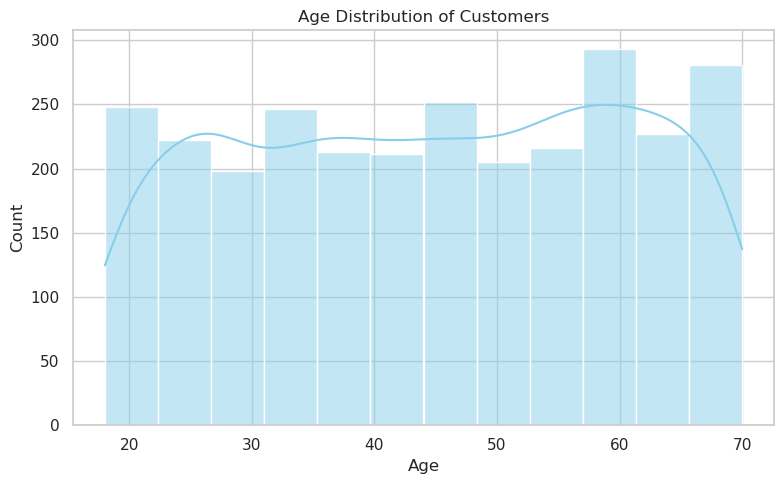

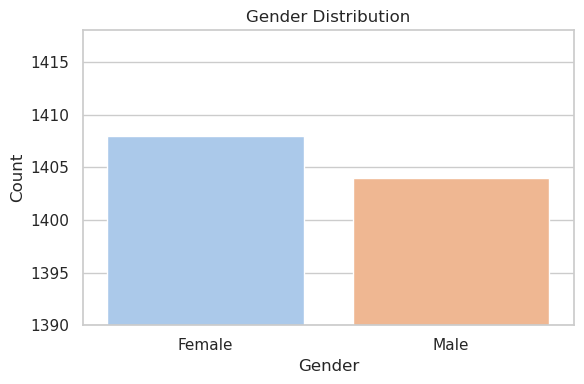

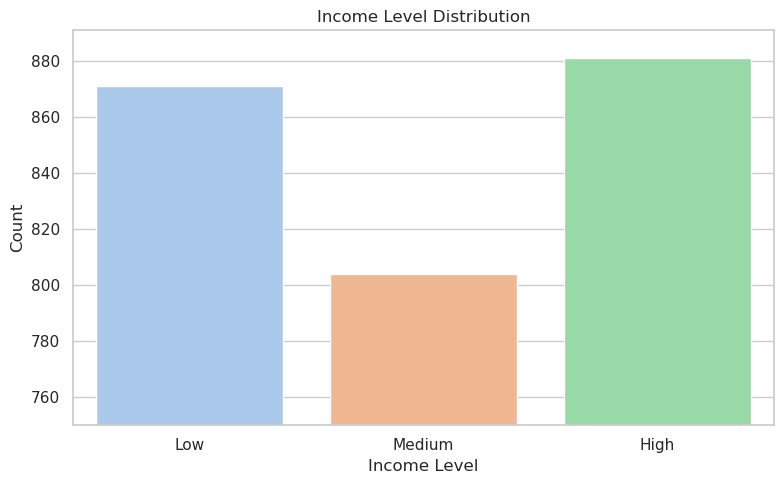

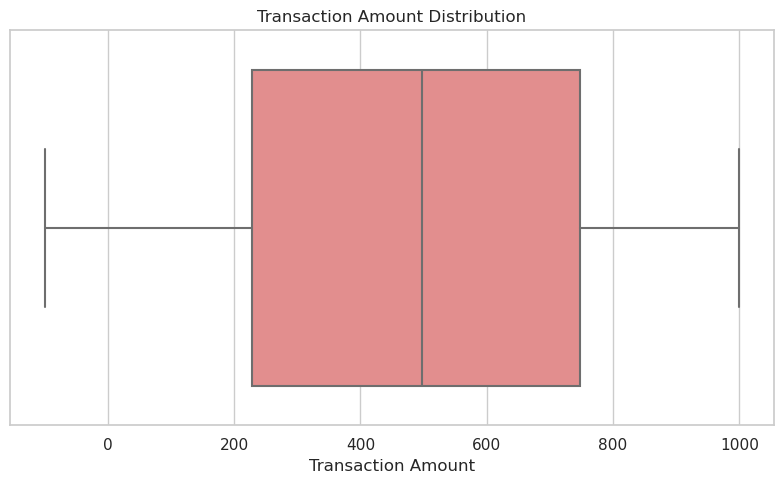

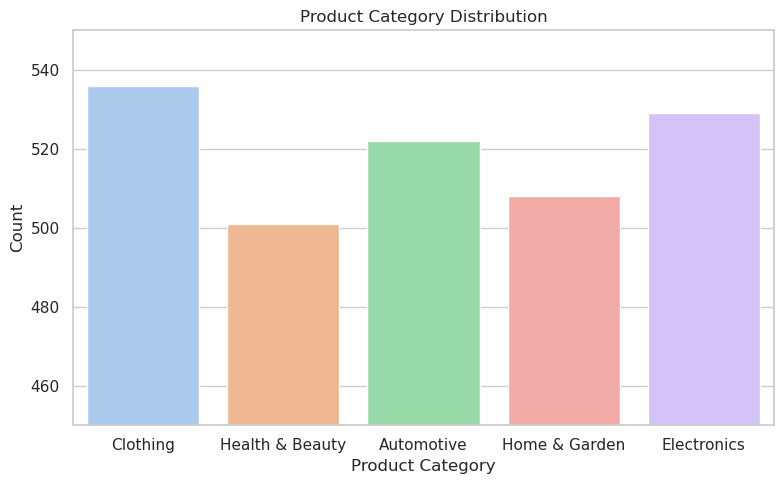

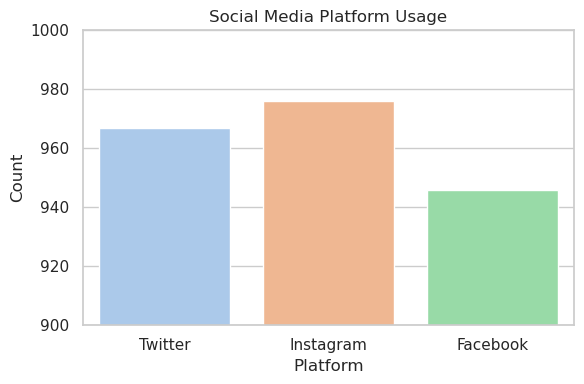

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

demographics = pd.read_csv('customer_demographics_cleaned.csv')
transactions = pd.read_csv('customer_transactions_cleaned.csv')
social_media = pd.read_csv('customer_social_media_cleaned.csv')

demographics.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
transactions.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
social_media.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

demographics['Age'] = pd.to_numeric(demographics['Age'], errors='coerce')
demographics = demographics.dropna(subset=['Age'])
demographics['Age'] = demographics['Age'].astype(int)

transactions['Amount'] = pd.to_numeric(transactions['Amount'], errors='coerce')
transactions = transactions.dropna(subset=['Amount'])


demographics['IncomeLevel'] = demographics['IncomeLevel'].str.strip().str.capitalize()
demographics['IncomeLevel'] = pd.Categorical(demographics['IncomeLevel'], categories=['Low', 'Medium', 'High'], ordered=True)


sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))
sns.histplot(demographics['Age'], bins=12, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=demographics, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.ylim(1390, demographics['Gender'].value_counts().max()+10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=demographics, x='IncomeLevel', palette='pastel')
plt.title('Income Level Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.ylim(750, demographics['IncomeLevel'].value_counts().max() + 10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=transactions, x='Amount', color='lightcoral')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=transactions, x='ProductCategory', palette='pastel')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.ylim(450, 550)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=social_media, x='Platform', palette='pastel')
plt.title('Social Media Platform Usage')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.ylim(900, 1000)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=social_media, x='InteractionType', palette='pastel')
plt.title('Social Media Interaction Types')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.ylim(1000, 1100)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=demographics, x='IncomeLevel', y='Age', palette='pastel')
plt.title('Age Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=transactions, x='ProductCategory', y='Amount', palette='pastel')
plt.title('Transaction Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=transactions, x='PaymentMethod', palette='pastel')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')

counts = transactions['PaymentMethod'].value_counts()
plt.ylim(max(0, counts.min() - 10), counts.max() + 10)

plt.tight_layout()
plt.show()
